In [1]:
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
%matplotlib inline

Please add SURFE to your environment variables to specify the location 
 of the SURFE binaries
Cannot import Surfe


In [2]:
density='Sparse'


dips = pd.read_csv('../%s/Dips.csv'%density,delimiter=';')
points_file_names = ['../Full/H1.csv','../BPoints.csv','../CPoints.csv','../DPoints.csv']
section_file_names = ['../ASection.csv','../BSection.csv','../CSection.csv','../DSection.csv']

# import all of the csv into the same dataframe
dfs = []
for f in glob.glob('../%s/*H*'%density):
    #*f in points_file_names:
#     dfs.append(pd.read_csv(f,delimiter=';'))
    dfs.append(pd.read_csv(f,delimiter=';'))

points = pd.concat(dfs,axis=0,ignore_index=True)



In [3]:
dips['ny'] = 0
dips['feature_name']= 'strati'
dips.rename(columns={'OrientX':'nx','OrientZ':'nz'},inplace=True)
dips.loc[dips['nx']<-100,'nx'] = np.nan
dips.loc[dips['nz']<-100,'nz'] = np.nan

In [4]:
points.rename(columns={'0':'Z','Strati':'val'},inplace=True)
points['feature_name'] = 'strati'
vals = points['val'].unique()

In [5]:
data = pd.concat([points,dips])
data

,X,Y,Z,val,PART_ID,feature_name,nx,nz,ny
0,1.505406,0.295540,3.325160,0.0,1,strati,NaN,NaN,NaN
1,1.710851,0.284936,3.248650,0.0,1,strati,NaN,NaN,NaN
2,1.851495,-0.003390,3.195370,0.0,1,strati,NaN,NaN,NaN
3,2.240846,-0.237692,3.043960,0.0,1,strati,NaN,NaN,NaN
4,2.651827,-0.044266,2.903360,0.0,1,strati,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1,3.909028,-0.102907,0.508749,NaN,4,strati,NaN,NaN,0.0
2,9.870857,0.058731,2.520195,NaN,20,strati,-0.764469,0.644660,0.0
3,9.810646,-0.148521,2.448793,NaN,20,strati,NaN,NaN,0.0
4,4.738157,-0.080016,3.335217,NaN,28,strati,NaN,NaN,0.0


In [6]:
origin = (0, -1.5, 0,)
scale=7.
nsteps = np.array((321,51,91))
nsteps = nsteps / scale
nsteps = nsteps.astype(int)
# nsteps = np.array((19,28,15))

step_vector = np.array((0.05,0.05,0.05))
step_vector = step_vector*scale
maximum = origin+step_vector*nsteps

In [7]:
print(origin, maximum)

(0, -1.5, 0) [15.75  0.95  4.55]


## Using PLI with 1e5 elements

In [8]:
model = GeologicalModel(origin,maximum,rescale=False)
model.set_model_data(data)
strati = model.create_and_add_foliation('strati',nelements=1e5,interpolatortype='PLI',solver='pyamg')

Pyamg not installed using cg instead



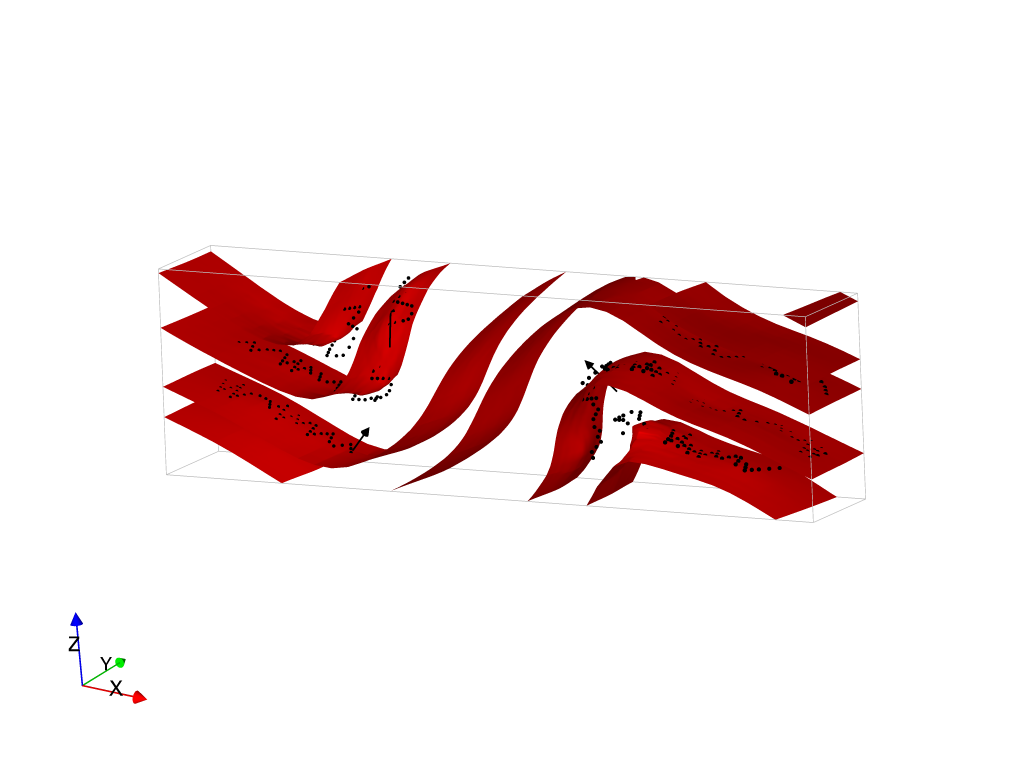

In [9]:
view = LavaVuModelViewer(model,)
view.add_data(model.features[0])
view.add_isosurface(model.features[0],slices=vals)
view.rotation = [-76.08123016357422, -27.247684478759766, -4.228135108947754]
view.display('hecho_PLI_1e5.png')


In [10]:
view.rotation

[-76.08123779296875, -27.247682571411133, -4.2281341552734375]

In [11]:
from LoopStructural.utils.utils import write_property_to_gocad_voxet, read_voxet
origin, voxet_extent, N, array, steps = read_voxet('ResultVoxet.vo','ResultVoxet_Strati@@')
x = np.linspace(origin[0],voxet_extent[0]+origin[0],N[0])
y = np.linspace(origin[1],voxet_extent[1]+origin[1],N[1])
z = np.linspace(origin[2],voxet_extent[2]+origin[2],N[2])

xx, yy, zz = np.meshgrid(x,y,z,indexing='ij')
eval_points = model.scale(np.array([xx.flatten(order='F'),yy.flatten(order='F'),zz.flatten(order='F')]).T)
vals = strati['feature'].evaluate_value(eval_points)
vals2 = vals.reshape((N[2],N[1],N[0]))
write_property_to_gocad_voxet('ResultsLoopStructural_result_PLI_1e5@@',vals2.flatten(order='C'))

## Using FDI with 2e4 elements

In [8]:
model = GeologicalModel(origin,maximum,rescale=False)
model.set_model_data(data)
model.create_and_add_foliation('strati',nelements=1e5/5,interpolatortype='FDI',solver='pyamg')


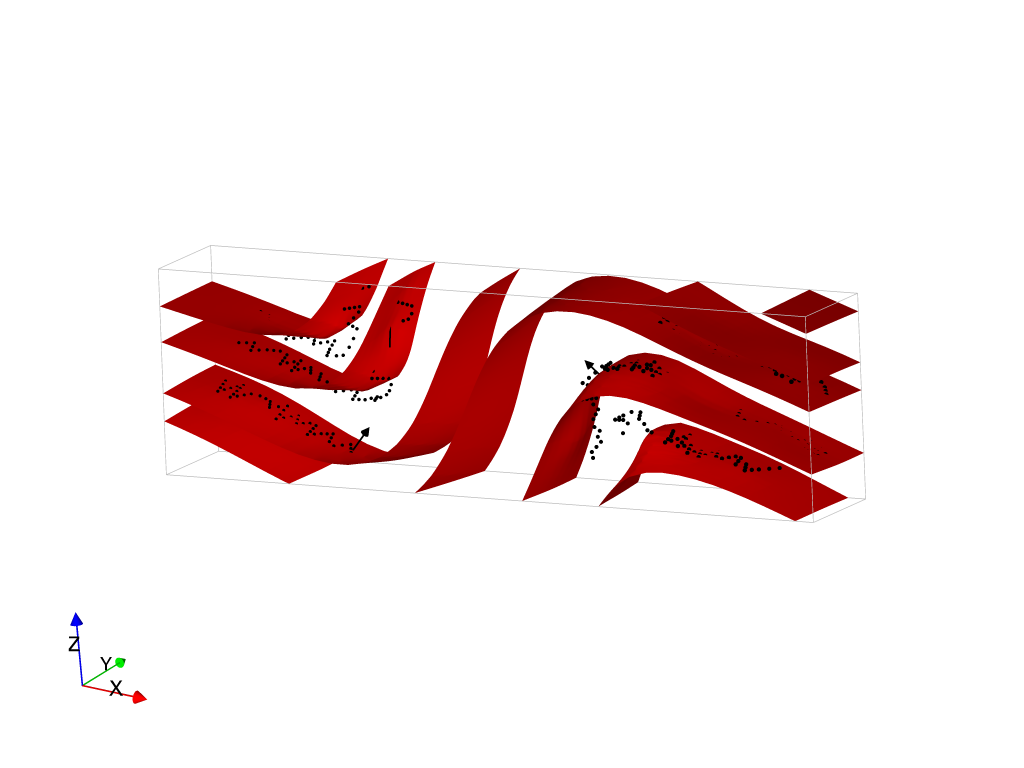

In [10]:
view = LavaVuModelViewer(model,)
view.add_data(model.features[0])
view.add_isosurface(model.features[0],slices=vals)
view.rotation = [-76.08123016357422, -27.247684478759766, -4.228135108947754]
view.display('hecho_FDI_2e4.png')

In [13]:
from LoopStructural.utils.utils import write_property_to_gocad_voxet, read_voxet
origin, voxet_extent, N, array, steps = read_voxet('ResultVoxet.vo','ResultVoxet_Strati@@')
x = np.linspace(origin[0],voxet_extent[0]+origin[0],N[0])
y = np.linspace(origin[1],voxet_extent[1]+origin[1],N[1])
z = np.linspace(origin[2],voxet_extent[2]+origin[2],N[2])

xx, yy, zz = np.meshgrid(x,y,z,indexing='ij')
eval_points = model.scale(np.array([xx.flatten(order='F'),yy.flatten(order='F'),zz.flatten(order='F')]).T)
vals = model.features[0].evaluate_value(eval_points)
vals2 = vals.reshape((N[2],N[1],N[0]))
write_property_to_gocad_voxet('ResultsLoopStructural_result_FDI_2e4@@',vals2.flatten(order='C'))